In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
flight=pd.read_csv("Flight_status (1).csv")
flight.head(10)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,23-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0
1,24-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0
2,25-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0
3,26-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,...,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0
4,27-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,...,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0
5,28-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1202.0,NaN,NaN,...,1236.0,1313.0,13.0,1304,22.0,1.0,1.0,1300-1359,1,0
6,29-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1204.0,2.0,2.0,...,1219.0,1253.0,10.0,1304,-1.0,0.0,-1.0,1300-1359,1,0
7,30-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1200.0,1244.0,11.0,1304,-9.0,0.0,-1.0,1300-1359,1,0
8,31-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1219.0,1256.0,8.0,1304,NaN,NaN,NaN,1300-1359,1,0
9,03-01-2018,Endeavor Air Inc.,ATL,ABY,False,False,1037,1101.0,24.0,24.0,...,1124.0,1156.0,3.0,1137,22.0,1.0,1.0,1100-1159,1,0


In [3]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 61 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   FlightDate                               1048575 non-null  object 
 1   Airline                                  1048575 non-null  object 
 2   Origin                                   1048575 non-null  object 
 3   Dest                                     1048575 non-null  object 
 4   Cancelled                                1048575 non-null  bool   
 5   Diverted                                 1048575 non-null  bool   
 6   CRSDepTime                               1048575 non-null  int64  
 7   DepTime                                  1032002 non-null  float64
 8   DepDelayMinutes                          1031514 non-null  float64
 9   DepDelay                                 1031514 non-null  float64
 10  ArrTime           

In [4]:
#Some Useless Columns:
#1>Flight_Number_Marketing_Airline
#2>Operated_or_Branded_Code_Share_Partners 
#3>DOT_ID_Marketing_Airline                   
#4>IATA_Code_Marketing_Airline              
#5>Flight_Number_Marketing_Airline
#6>Operating_Airline
#7>DOT_ID_Operating_Airline                   
#8>IATA_Code_Operating_Airline               
#9>Tail_Number                               
#10>Flight_Number_Operating_Airline
#11>OriginAirportID
#13>OriginStateFips
#14>OriginAirportSeqID                         
#15>OriginCityMarketID
#16>OriginWac
#17>DestAirportID                             
#18>DestAirportSeqID                          
#19>DestCityMarketID 
#20>DestStateFips                          
#21>DestWac
#22>Marketing_Airline_Network 
#23>"Year"
#24>FlightDate
#Dropping them

In [5]:
flight2=flight.drop(["FlightDate","Year","Marketing_Airline_Network","Flight_Number_Marketing_Airline","Operated_or_Branded_Code_Share_Partners","DOT_ID_Marketing_Airline",
"IATA_Code_Marketing_Airline","Flight_Number_Marketing_Airline","Operating_Airline","DOT_ID_Operating_Airline","IATA_Code_Operating_Airline",
"Tail_Number","Flight_Number_Operating_Airline","OriginAirportID","OriginStateFips","OriginAirportSeqID","OriginState","DestState",
"OriginCityMarketID","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID", "DestStateFips","DestWac"],axis=1)

In [6]:
flight2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Airline               1048575 non-null  object 
 1   Origin                1048575 non-null  object 
 2   Dest                  1048575 non-null  object 
 3   Cancelled             1048575 non-null  bool   
 4   Diverted              1048575 non-null  bool   
 5   CRSDepTime            1048575 non-null  int64  
 6   DepTime               1032002 non-null  float64
 7   DepDelayMinutes       1031514 non-null  float64
 8   DepDelay              1031514 non-null  float64
 9   ArrTime               1031060 non-null  float64
 10  ArrDelayMinutes       1029014 non-null  float64
 11  AirTime               1028355 non-null  float64
 12  CRSElapsedTime        1048575 non-null  int64  
 13  ActualElapsedTime     1029216 non-null  float64
 14  Distance              1048575 non-

In [7]:
flight2.head()

,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1256.0,...,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0
1,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1258.0,...,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0
2,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,1302.0,...,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0
3,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,1253.0,...,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0
4,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,1459.0,...,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0


In [8]:
flight2.isnull().sum()

Airline                     0
Origin                      0
Dest                        0
Cancelled                   0
Diverted                    0
CRSDepTime                  0
DepTime                 16573
DepDelayMinutes         17061
DepDelay                17061
ArrTime                 17515
ArrDelayMinutes         19561
AirTime                 20220
CRSElapsedTime              0
ActualElapsedTime       19359
Distance                    0
Quarter                     0
Month                       0
DayofMonth                  0
DayOfWeek                   0
OriginCityName              0
OriginStateName             0
DestCityName                0
DestStateName               0
DepDel15                17061
DepartureDelayGroups    17061
DepTimeBlk                  0
TaxiOut                 17756
WheelsOff               17747
WheelsOn                18367
TaxiIn                  18376
CRSArrTime                  0
ArrDelay                19561
ArrDel15                19561
ArrivalDel

In [9]:
print(flight["DepDelayMinutes"].value_counts())

0.0       706275
1.0        21469
2.0        16983
3.0        14754
4.0        13319
           ...  
752.0          1
1168.0         1
645.0          1
724.0          1
1132.0         1
Name: DepDelayMinutes, Length: 1052, dtype: int64


In [10]:
print(flight["DepDelay"].value_counts())

-5.0       84344
-4.0       79654
-3.0       76187
-2.0       68532
-6.0       67489
           ...  
 1418.0        1
 1032.0        1
 937.0         1
 869.0         1
 1020.0        1
Name: DepDelay, Length: 1162, dtype: int64


In [11]:
print(flight["DepDel15"].value_counts())

0.0    860830
1.0    170684
Name: DepDel15, dtype: int64


In [12]:
print(flight["DepartureDelayGroups"].value_counts())

-1.0     647834
 0.0     204086
 1.0      61959
 2.0      32487
 3.0      20037
 4.0      12990
 12.0     10022
 5.0       9263
-2.0       8910
 6.0       6805
 7.0       5341
 8.0       4004
 9.0       3157
 10.0      2555
 11.0      2064
Name: DepartureDelayGroups, dtype: int64


In [13]:
print(flight["DistanceGroup"].value_counts())

2     271985
3     204999
4     154129
1     152274
5     101676
7      42164
6      41447
10     25696
8      20987
11     18588
9      14630
Name: DistanceGroup, dtype: int64


In [14]:
print(flight["DivAirportLandings"].value_counts())

0    1046115
1       2265
9        167
2         28
Name: DivAirportLandings, dtype: int64


In [15]:
# For departure and arrival delay we already have 2 columns. Thus we remove the ones which has -ve values 

In [16]:
flight3 = flight2.drop(["DepDelay","ArrDelay"],axis=1)

In [17]:
flight3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 35 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Airline               1048575 non-null  object 
 1   Origin                1048575 non-null  object 
 2   Dest                  1048575 non-null  object 
 3   Cancelled             1048575 non-null  bool   
 4   Diverted              1048575 non-null  bool   
 5   CRSDepTime            1048575 non-null  int64  
 6   DepTime               1032002 non-null  float64
 7   DepDelayMinutes       1031514 non-null  float64
 8   ArrTime               1031060 non-null  float64
 9   ArrDelayMinutes       1029014 non-null  float64
 10  AirTime               1028355 non-null  float64
 11  CRSElapsedTime        1048575 non-null  int64  
 12  ActualElapsedTime     1029216 non-null  float64
 13  Distance              1048575 non-null  int64  
 14  Quarter               1048575 non-

In [18]:
flight3.columns

Index(['Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'AirTime',
       'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'OriginCityName', 'OriginStateName',
       'DestCityName', 'DestStateName', 'DepDel15', 'DepartureDelayGroups',
       'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'CRSArrTime', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'DistanceGroup', 'DivAirportLandings'],
      dtype='object')

# PROBLEM 1:Predict which flights will be cancelled or delayed(Classification)

In [19]:
flight3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 35 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Airline               1048575 non-null  object 
 1   Origin                1048575 non-null  object 
 2   Dest                  1048575 non-null  object 
 3   Cancelled             1048575 non-null  bool   
 4   Diverted              1048575 non-null  bool   
 5   CRSDepTime            1048575 non-null  int64  
 6   DepTime               1032002 non-null  float64
 7   DepDelayMinutes       1031514 non-null  float64
 8   ArrTime               1031060 non-null  float64
 9   ArrDelayMinutes       1029014 non-null  float64
 10  AirTime               1028355 non-null  float64
 11  CRSElapsedTime        1048575 non-null  int64  
 12  ActualElapsedTime     1029216 non-null  float64
 13  Distance              1048575 non-null  int64  
 14  Quarter               1048575 non-

# GLOSSARY

#Airline = Airline Names
#Origin =  Starting Airport
#Dest =   Destination Airport
#Cancelled = Cancelled Flights(1 = cancelled)
#Diverted = Aircraft landed on different airport that the one scheduled
#CRSDepTime = Planned Departure Time
#DepTime = Actual Departure Time(WHEEL_OFF - TAXI_OUT)
#DepDelayMinutes =  Total Delay on Departure in minutes
#ArrTime =  Actual Arrival Time( WHEELS_ON + TAXI_IN)
#ArrDelayMinutes = Total Delay on Arrival in minutes
#AirTime = The time duration between wheels_off and wheels_on time
#CRSElapsedTime = Planned or scheduled time amount needed for the flight trip
#ActualElapsedTime = Actual Time the flight travels in air
#Distance = Distance between airports 
#Quarter = 
#Month= 
#DayofMonth = 
#DayOfWeek = 
#OriginCityName
#OriginState
#OriginStateName
#DestCityName
#DestState
#DestStateName
#DepDel15= Departure Delay Indicator, 15 Minutes or More (1=Yes)
#DepartureDelayGroups = 
#DepTimeBlk = CRS Departure Time Block, Hourly Intervals



#WheelsOff = The time point that the aircraft's wheels leave the ground

#WheelsOn = The time point that the aircraft's wheels touch on the ground

#TaxiIn = The time duration elapsed between wheels-on and gate arrival at the destination airport

#TaxiOut = The time duration elapsed between departure from the origin airport gate and wheels off

#CRSArrTime
#ArrDel15
#ArrivalDelayGroups
#ArrTimeBlk = CRS Arrival Time Block, Hourly Intervals
#DistanceGroup
#DivAirportLandings



#Distance = Distance between airports
#TaxiOut
#WheelsOff
#WheelsOn
#DistanceGroup

In [20]:
flight3.isnull().sum()

Airline                     0
Origin                      0
Dest                        0
Cancelled                   0
Diverted                    0
CRSDepTime                  0
DepTime                 16573
DepDelayMinutes         17061
ArrTime                 17515
ArrDelayMinutes         19561
AirTime                 20220
CRSElapsedTime              0
ActualElapsedTime       19359
Distance                    0
Quarter                     0
Month                       0
DayofMonth                  0
DayOfWeek                   0
OriginCityName              0
OriginStateName             0
DestCityName                0
DestStateName               0
DepDel15                17061
DepartureDelayGroups    17061
DepTimeBlk                  0
TaxiOut                 17756
WheelsOff               17747
WheelsOn                18367
TaxiIn                  18376
CRSArrTime                  0
ArrDel15                19561
ArrivalDelayGroups      19561
ArrTimeBlk                  0
DistanceGr

In [21]:
flight3["DepartureDelayGroups"]=flight3["DepartureDelayGroups"].replace([-2,-1],0)

In [22]:
flight3["ArrivalDelayGroups"]=flight3["ArrivalDelayGroups"].replace([-2,-1],0)

In [23]:
flight3["ArrTimeBlk"]=flight3["ArrTimeBlk"].replace(['0001-0559'],'0500-0559')

In [24]:
flight3["DepTimeBlk"]=flight3["DepTimeBlk"].replace(['0001-0559'],'0500-0559')

In [25]:
flight3.isnull().sum()

Airline                     0
Origin                      0
Dest                        0
Cancelled                   0
Diverted                    0
CRSDepTime                  0
DepTime                 16573
DepDelayMinutes         17061
ArrTime                 17515
ArrDelayMinutes         19561
AirTime                 20220
CRSElapsedTime              0
ActualElapsedTime       19359
Distance                    0
Quarter                     0
Month                       0
DayofMonth                  0
DayOfWeek                   0
OriginCityName              0
OriginStateName             0
DestCityName                0
DestStateName               0
DepDel15                17061
DepartureDelayGroups    17061
DepTimeBlk                  0
TaxiOut                 17756
WheelsOff               17747
WheelsOn                18367
TaxiIn                  18376
CRSArrTime                  0
ArrDel15                19561
ArrivalDelayGroups      19561
ArrTimeBlk                  0
DistanceGr

In [26]:
flight3 = flight3.drop(["CRSDepTime","DepTime","ArrTime","CRSArrTime","WheelsOff","WheelsOn"],axis=1)

In [27]:
flight3.dtypes

Airline                  object
Origin                   object
Dest                     object
Cancelled                  bool
Diverted                   bool
DepDelayMinutes         float64
ArrDelayMinutes         float64
AirTime                 float64
CRSElapsedTime            int64
ActualElapsedTime       float64
Distance                  int64
Quarter                   int64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
OriginCityName           object
OriginStateName          object
DestCityName             object
DestStateName            object
DepDel15                float64
DepartureDelayGroups    float64
DepTimeBlk               object
TaxiOut                 float64
TaxiIn                  float64
ArrDel15                float64
ArrivalDelayGroups      float64
ArrTimeBlk               object
DistanceGroup             int64
DivAirportLandings        int64
dtype: object

In [28]:
flight3.isnull().sum()

Airline                     0
Origin                      0
Dest                        0
Cancelled                   0
Diverted                    0
DepDelayMinutes         17061
ArrDelayMinutes         19561
AirTime                 20220
CRSElapsedTime              0
ActualElapsedTime       19359
Distance                    0
Quarter                     0
Month                       0
DayofMonth                  0
DayOfWeek                   0
OriginCityName              0
OriginStateName             0
DestCityName                0
DestStateName               0
DepDel15                17061
DepartureDelayGroups    17061
DepTimeBlk                  0
TaxiOut                 17756
TaxiIn                  18376
ArrDel15                19561
ArrivalDelayGroups      19561
ArrTimeBlk                  0
DistanceGroup               0
DivAirportLandings          0
dtype: int64

In [29]:
flight3["Cancelled"].value_counts()

False    1031528
True       17047
Name: Cancelled, dtype: int64

In [30]:
# Dealing With Missing Values:

In [31]:
flight4=flight3.interpolate(method ='linear', limit_direction ='forward')

In [32]:
flight4.isnull().sum()

Airline                 0
Origin                  0
Dest                    0
Cancelled               0
Diverted                0
DepDelayMinutes         0
ArrDelayMinutes         0
AirTime                 0
CRSElapsedTime          0
ActualElapsedTime       0
Distance                0
Quarter                 0
Month                   0
DayofMonth              0
DayOfWeek               0
OriginCityName          0
OriginStateName         0
DestCityName            0
DestStateName           0
DepDel15                0
DepartureDelayGroups    0
DepTimeBlk              0
TaxiOut                 0
TaxiIn                  0
ArrDel15                0
ArrivalDelayGroups      0
ArrTimeBlk              0
DistanceGroup           0
DivAirportLandings      0
dtype: int64

In [33]:
flight4.dtypes

Airline                  object
Origin                   object
Dest                     object
Cancelled                  bool
Diverted                   bool
DepDelayMinutes         float64
ArrDelayMinutes         float64
AirTime                 float64
CRSElapsedTime            int64
ActualElapsedTime       float64
Distance                  int64
Quarter                   int64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
OriginCityName           object
OriginStateName          object
DestCityName             object
DestStateName            object
DepDel15                float64
DepartureDelayGroups    float64
DepTimeBlk               object
TaxiOut                 float64
TaxiIn                  float64
ArrDel15                float64
ArrivalDelayGroups      float64
ArrTimeBlk               object
DistanceGroup             int64
DivAirportLandings        int64
dtype: object

In [34]:
flight4['CRSElapsedTime']=flight4['CRSElapsedTime'].astype('float64')
flight4['Distance']=flight4['Distance'].astype('float64')
flight4['ArrDel15']=flight4['ArrDel15'].astype('bool')
flight4['DepDel15']=flight4['DepDel15'].astype('bool')
flight4['ArrivalDelayGroups']=flight4['ArrivalDelayGroups'].astype('int64')
flight4['DepartureDelayGroups']=flight4['DepartureDelayGroups'].astype('int64')

In [35]:
flight4.dtypes

Airline                  object
Origin                   object
Dest                     object
Cancelled                  bool
Diverted                   bool
DepDelayMinutes         float64
ArrDelayMinutes         float64
AirTime                 float64
CRSElapsedTime          float64
ActualElapsedTime       float64
Distance                float64
Quarter                   int64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
OriginCityName           object
OriginStateName          object
DestCityName             object
DestStateName            object
DepDel15                   bool
DepartureDelayGroups      int64
DepTimeBlk               object
TaxiOut                 float64
TaxiIn                  float64
ArrDel15                   bool
ArrivalDelayGroups        int64
ArrTimeBlk               object
DistanceGroup             int64
DivAirportLandings        int64
dtype: object

In [36]:
flight4["DepartureDelayGroups"].unique()

array([ 0,  1,  7,  3,  4,  8,  2,  5,  6, 12,  9, 10, 11], dtype=int64)

In [37]:
flight4["ArrivalDelayGroups"].unique()

array([ 0,  1,  7,  4,  8,  2,  3,  6,  5, 12, 10, 11,  9], dtype=int64)

In [38]:
flight4["ArrTimeBlk"].unique()

array(['1300-1359', '1500-1559', '1100-1159', '1000-1059', '0800-0859',
       '1200-1259', '2300-2359', '1400-1459', '1900-1959', '1600-1659',
       '1700-1759', '2200-2259', '1800-1859', '2000-2059', '2100-2159',
       '0700-0759', '0900-0959', '0600-0659', '0500-0559'], dtype=object)

In [39]:
flight4["DepTimeBlk"].unique()

array(['1200-1259', '1400-1459', '1000-1059', '0900-0959', '0800-0859',
       '0700-0759', '2200-2259', '1800-1859', '1500-1559', '1300-1359',
       '1900-1959', '1700-1759', '1600-1659', '1100-1159', '2100-2159',
       '0600-0659', '2000-2059', '0500-0559', '2300-2359'], dtype=object)

In [40]:
flight4["DistanceGroup"].unique()

array([ 1,  2,  4,  3,  5,  6, 11,  9, 10,  7,  8], dtype=int64)

In [41]:
flight4.head(40)

,Airline,Origin,Dest,Cancelled,Diverted,DepDelayMinutes,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,...,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,TaxiIn,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,38.0,62.0,59.0,...,False,0,1200-1259,14.0,7.0,False,0,1300-1359,1,0
1,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,36.0,62.0,61.0,...,False,0,1200-1259,13.0,12.0,False,0,1300-1359,1,0
2,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,40.0,62.0,69.0,...,False,0,1200-1259,18.0,11.0,False,0,1300-1359,1,0
3,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,35.0,62.0,63.0,...,False,0,1200-1259,17.0,11.0,False,0,1300-1359,1,0
4,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,36.0,60.0,64.0,...,False,0,1400-1459,17.0,11.0,False,0,1500-1559,1,0
5,Endeavor Air Inc.,ABY,ATL,False,False,1.0,22.0,37.0,62.0,84.0,...,False,0,1200-1259,34.0,13.0,True,1,1300-1359,1,0
6,Endeavor Air Inc.,ABY,ATL,False,False,2.0,0.0,34.0,62.0,59.0,...,False,0,1200-1259,15.0,10.0,False,0,1300-1359,1,0
7,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,44.0,62.0,62.0,...,False,0,1200-1259,7.0,11.0,False,0,1300-1359,1,0
8,Endeavor Air Inc.,ABY,ATL,False,False,0.0,11.0,37.0,62.0,71.0,...,False,0,1200-1259,26.0,8.0,True,0,1300-1359,1,0
9,Endeavor Air Inc.,ATL,ABY,False,False,24.0,22.0,32.0,60.0,58.0,...,True,1,1000-1059,23.0,3.0,True,1,1100-1159,1,0


In [42]:
len(flight4["Airline"].unique())

28

In [43]:
flight4["Cancelled"].value_counts()

False    1031528
True       17047
Name: Cancelled, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in flight4.select_dtypes(include='object').columns:
    flight4[col]=le.fit_transform(flight4[col].astype(str))  

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in flight4.select_dtypes(include='bool').columns:
    flight4[col]=le.fit_transform(flight4[col].astype(str))  

In [46]:
X=flight4.drop(["Cancelled"],axis=1)
y=flight4["Cancelled"]

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [48]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(X_train,y_train)
mi

array([1.99516612e-02, 5.32224857e-03, 4.88082072e-03, 3.93569862e-05,
       2.65395552e-02, 2.73016491e-02, 3.67903580e-02, 1.21840063e-03,
       3.81171868e-02, 4.10599326e-03, 9.78082109e-02, 1.06019333e-01,
       1.20672184e-02, 2.33902059e-02, 5.49400239e-03, 8.04220463e-03,
       5.15273458e-03, 8.53267942e-03, 8.38800682e-03, 3.55272946e-03,
       8.46333946e-03, 4.68176109e-02, 5.27411620e-02, 8.74848082e-03,
       3.42740026e-03, 9.44541990e-03, 2.12113780e-02, 4.78156422e-04])

In [49]:
mi=pd.Series(mi)
mi.index=X_train.columns
mi.sort_values(ascending=False)

Month                   0.106019
Quarter                 0.097808
TaxiIn                  0.052741
TaxiOut                 0.046818
ActualElapsedTime       0.038117
AirTime                 0.036790
ArrDelayMinutes         0.027302
DepDelayMinutes         0.026540
DayOfWeek               0.023390
DistanceGroup           0.021211
Airline                 0.019952
DayofMonth              0.012067
ArrTimeBlk              0.009445
ArrDel15                0.008748
DestStateName           0.008533
DepTimeBlk              0.008463
DepDel15                0.008388
OriginStateName         0.008042
OriginCityName          0.005494
Origin                  0.005322
DestCityName            0.005153
Dest                    0.004881
Distance                0.004106
DepartureDelayGroups    0.003553
ArrivalDelayGroups      0.003427
CRSElapsedTime          0.001218
DivAirportLandings      0.000478
Diverted                0.000039
dtype: float64

<AxesSubplot:>

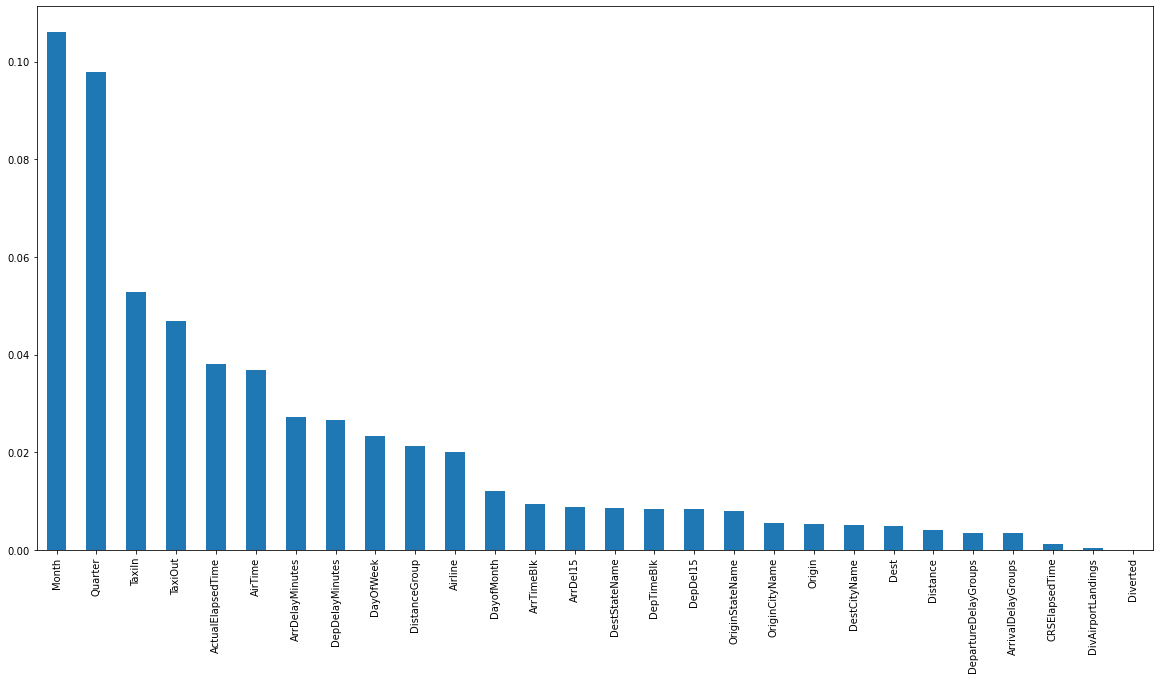

In [50]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,10))

In [51]:
a=mi.sort_values(ascending=False)
for cols in a.iteritems():
    print(cols) 

('Month', 0.1060193333380115)
('Quarter', 0.0978082109479903)
('TaxiIn', 0.052741161979918405)
('TaxiOut', 0.04681761087396774)
('ActualElapsedTime', 0.038117186826080895)
('AirTime', 0.036790358035657555)
('ArrDelayMinutes', 0.027301649066464595)
('DepDelayMinutes', 0.026539555243437873)
('DayOfWeek', 0.023390205912220075)
('DistanceGroup', 0.021211377996877112)
('Airline', 0.01995166124901393)
('DayofMonth', 0.012067218414788639)
('ArrTimeBlk', 0.009445419904394736)
('ArrDel15', 0.00874848082008417)
('DestStateName', 0.008532679418143285)
('DepTimeBlk', 0.00846333946402622)
('DepDel15', 0.008388006815063243)
('OriginStateName', 0.008042204628793459)
('OriginCityName', 0.00549400238868647)
('Origin', 0.0053222485656041485)
('DestCityName', 0.005152734577598572)
('Dest', 0.004880820716729017)
('Distance', 0.004105993262458751)
('DepartureDelayGroups', 0.0035527294610901983)
('ArrivalDelayGroups', 0.0034274002629890443)
('CRSElapsedTime', 0.0012184006264741587)
('DivAirportLandings', 0.

In [83]:
cancel_final=flight4[['Month','Quarter','TaxiIn','TaxiOut','ActualElapsedTime','AirTime','ArrDelayMinutes',
                     'DepDelayMinutes','DayOfWeek','DistanceGroup','Airline','DayofMonth','Cancelled']]

In [84]:
cancel_final.head()

,Month,Quarter,TaxiIn,TaxiOut,ActualElapsedTime,AirTime,ArrDelayMinutes,DepDelayMinutes,DayOfWeek,DistanceGroup,Airline,DayofMonth,Cancelled
0,1,1,7.0,14.0,59.0,38.0,0.0,0.0,2,1,11,23,0
1,1,1,12.0,13.0,61.0,36.0,0.0,0.0,3,1,11,24,0
2,1,1,11.0,18.0,69.0,40.0,0.0,0.0,4,1,11,25,0
3,1,1,11.0,17.0,63.0,35.0,0.0,0.0,5,1,11,26,0
4,1,1,11.0,17.0,64.0,36.0,0.0,0.0,6,1,11,27,0


In [169]:
cancel_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Month              1048575 non-null  int64  
 1   Quarter            1048575 non-null  int64  
 2   TaxiIn             1048575 non-null  float64
 3   TaxiOut            1048575 non-null  float64
 4   ActualElapsedTime  1048575 non-null  float64
 5   AirTime            1048575 non-null  float64
 6   ArrDelayMinutes    1048575 non-null  float64
 7   DepDelayMinutes    1048575 non-null  float64
 8   DayOfWeek          1048575 non-null  int64  
 9   DistanceGroup      1048575 non-null  int64  
 10  Airline            1048575 non-null  int32  
 11  DayofMonth         1048575 non-null  int64  
 12  Cancelled          1048575 non-null  int32  
dtypes: float64(6), int32(2), int64(5)
memory usage: 96.0 MB


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(cancel_final)

array([[-1.13623315, -1.13623315, -0.05360769, ..., -0.62314707,
         0.79259584, -0.12855337],
       [-1.13623315, -1.13623315,  0.84360862, ..., -0.62314707,
         0.9054405 , -0.12855337],
       [-1.13623315, -1.13623315,  0.66416536, ..., -0.62314707,
         1.01828516, -0.12855337],
       ...,
       [ 0.88010106,  0.88010106, -0.23305095, ...,  1.24484652,
        -1.12576338, -0.12855337],
       [ 0.88010106,  0.88010106,  0.4847221 , ...,  1.24484652,
        -1.12576338, -0.12855337],
       [ 0.88010106,  0.88010106,  0.4847221 , ...,  1.24484652,
        -1.12576338, -0.12855337]])

# 1>LOGISTIC REGRESSION

In [89]:
# Splitting into train and test data set
X=cancel_final.drop(["Cancelled"],axis=1)
y=cancel_final["Cancelled"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=None)

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score

In [92]:
lr=LogisticRegression()

In [93]:
lr.fit(X_train,y_train)

C:\Users\rauna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
print("Training Score in LR:=",accuracy_score(y_train,lr.predict(X_train)))
print("Test Score in LR:=",accuracy_score(y_test,lr.predict(X_test)))

Training Score in LR:= 0.9838706161563593
Test Score in LR:= 0.9837017162947869


In [95]:
y_pred_lr = lr.predict(X_test) 

In [96]:
print(accuracy_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

0.9837017162947869
0.0162982837052131
0.1276647316419578


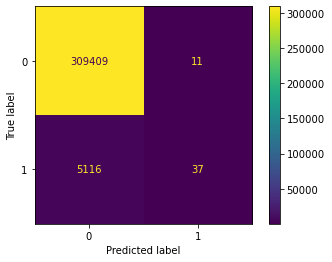

In [97]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [98]:
# Calculate the classification report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    309420
           1       0.77      0.01      0.01      5153

    accuracy                           0.98    314573
   macro avg       0.88      0.50      0.50    314573
weighted avg       0.98      0.98      0.98    314573



In [99]:
# Calculate roc_auc_score
roc_auc_lr=(roc_auc_score(y_test, y_pred_lr))
print(roc_auc_lr)

0.5035723664727542


# NAIVE BAYES

In [100]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [101]:
nb.fit(X_train,y_train)

GaussianNB()

In [102]:
print("Training Scpre in NB:=",accuracy_score(y_train,nb.predict(X_train)))
print("Test Score in NB:=",accuracy_score(y_test,nb.predict(X_test)))

Training Scpre in NB:= 0.958780766264942
Test Score in NB:= 0.958995209379063


In [103]:
y_pred_nb = nb.predict(X_test) 

In [104]:
print(accuracy_score(y_test,y_pred_nb))
print(mean_absolute_error(y_test,y_pred_nb))
print(np.sqrt(mean_squared_error(y_test,y_pred_nb)))

0.958995209379063
0.041004790620936954
0.20249639656284493


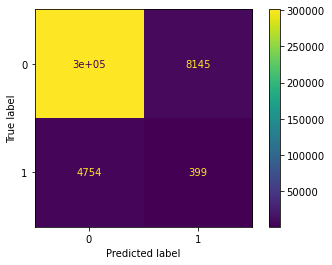

In [105]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_nb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [106]:
# Calculate the classification report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98    309420
           1       0.05      0.08      0.06      5153

    accuracy                           0.96    314573
   macro avg       0.52      0.53      0.52    314573
weighted avg       0.97      0.96      0.96    314573



In [107]:
# Calculate roc_auc_score
roc_auc_nb=(roc_auc_score(y_test, y_pred_nb))
print(roc_auc_nb)

0.5255535895376917


# DECISION TREE CLASSIFIER

In [108]:
from sklearn.tree import DecisionTreeClassifier
training_accuracy = []
test_accuracy = []
for max_d in range(1,30):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_train, y_train))
    print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(X_train, y_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(X_test,y_test))
    print('')

The Training Accuracy for max_depth 1 is: 0.9837956844804238
The Validation Accuracy for max_depth 1 is: 0.9836190645732469

The Training Accuracy for max_depth 2 is: 0.9841676180718854
The Validation Accuracy for max_depth 2 is: 0.9839337768975722

The Training Accuracy for max_depth 3 is: 0.9841676180718854
The Validation Accuracy for max_depth 3 is: 0.9839242401604715

The Training Accuracy for max_depth 4 is: 0.984173067648317
The Validation Accuracy for max_depth 4 is: 0.9839305979852053

The Training Accuracy for max_depth 5 is: 0.98419077877172
The Validation Accuracy for max_depth 5 is: 0.9839274190728384

The Training Accuracy for max_depth 6 is: 0.9848842373726502
The Validation Accuracy for max_depth 6 is: 0.9845790961080576

The Training Accuracy for max_depth 7 is: 0.9854591676861916
The Validation Accuracy for max_depth 7 is: 0.9851163322980675

The Training Accuracy for max_depth 8 is: 0.9862970400625611
The Validation Accuracy for max_depth 8 is: 0.9859937121113382

The

In [109]:
from sklearn.tree import DecisionTreeClassifier  
dt = DecisionTreeClassifier(max_depth=16,random_state = 100)  
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, random_state=100)

In [110]:
print("Training Score in DT:=",accuracy_score(y_train,dt.predict(X_train)))
print("Test Score in DT:=",accuracy_score(y_test,dt.predict(X_test)))

Training Score in DT:= 0.9905517968615889
Test Score in DT:= 0.9871158681768619


In [111]:
y_pred_dt = dt.predict(X_test)

In [112]:
print(accuracy_score(y_test,y_pred_dt))
print(mean_absolute_error(y_test,y_pred_dt))
print(np.sqrt(mean_squared_error(y_test,y_pred_dt)))

0.9871158681768619
0.012884131823138032
0.11350828966704604


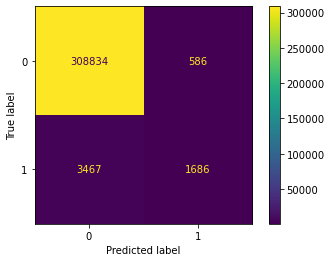

In [113]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [114]:
# Calculate the classification report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    309420
           1       0.74      0.33      0.45      5153

    accuracy                           0.99    314573
   macro avg       0.87      0.66      0.72    314573
weighted avg       0.98      0.99      0.98    314573



In [115]:
# Calculate roc_auc_score
roc_auc_dt=(roc_auc_score(y_test, y_pred_dt))
print(roc_auc_dt)

0.6626470899279161


# KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
#Choosing optimal value of  k 
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15.
neighbors_settings = range(1, 16)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    print('The Training Accuracy for k {} is:'.format(n_neighbors), clf.score(X_test,y_test))
    print('The Validation Accuracy for k {} is:'.format(n_neighbors), clf.score(X_test,y_test))
    print('')
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()

KeyboardInterrupt: 

In [118]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [119]:
print("Training Score in KNN:=",accuracy_score(y_train,knn.predict(X_train)))
print("Test Score in KNN:=",accuracy_score(y_test,knn.predict(X_test)))

Training Score in KNN:= 0.9863351870975828
Test Score in KNN:= 0.9824524037345862


In [120]:
y_pred_knn = knn.predict(X_test)

In [121]:
print(accuracy_score(y_test,y_pred_knn))
print(mean_absolute_error(y_test,y_pred_knn))
print(np.sqrt(mean_squared_error(y_test,y_pred_knn)))

0.9824524037345862
0.017547596265413752
0.13246734037268867


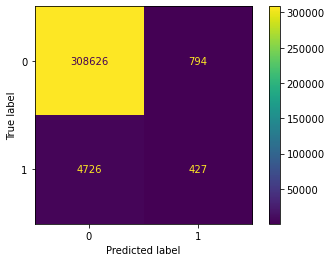

In [122]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [123]:
# Calculate the classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    309420
           1       0.35      0.08      0.13      5153

    accuracy                           0.98    314573
   macro avg       0.67      0.54      0.56    314573
weighted avg       0.97      0.98      0.98    314573



In [124]:
# Calculate roc_auc_score
roc_auc_knn=(roc_auc_score(y_test, y_pred_knn))
print(roc_auc_knn)

0.5401491297333839


# ROC-AUC CURVE

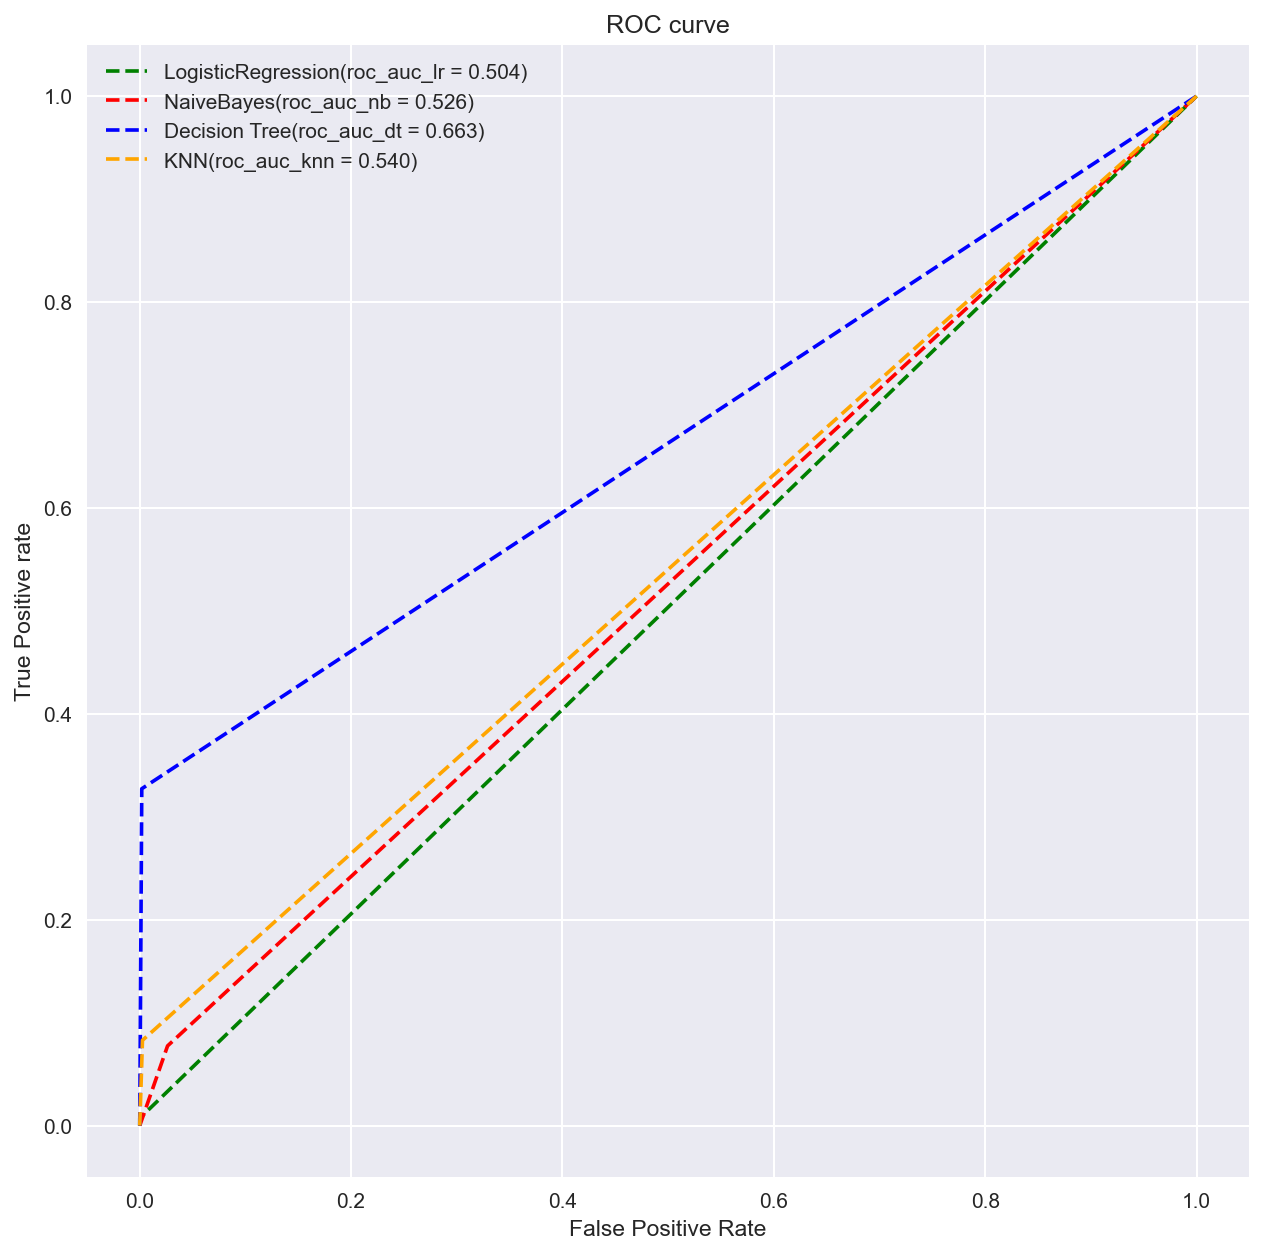

In [125]:
plt.style.use('seaborn')
fpr_lr, tpr_lr, thresh1 = roc_curve(y_test, y_pred_lr)
fpr_nb, tpr_nb, thresh2 = roc_curve(y_test, y_pred_nb)
fpr_dt, tpr_dt, thresh3 = roc_curve(y_test, y_pred_dt)
fpr_knn, tpr_knn, thresh4 = roc_curve(y_test, y_pred_knn)
# plot roc curves
plt.figure(figsize=(10, 10),dpi=150)
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='green', label='LogisticRegression(roc_auc_lr = %0.3f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, linestyle='--',color='red', label='NaiveBayes(roc_auc_nb = %0.3f)' % roc_auc_nb)
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='blue', label='Decision Tree(roc_auc_dt = %0.3f)' % roc_auc_dt)
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='orange', label='KNN(roc_auc_knn = %0.3f)' % roc_auc_knn)

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

# BALANCING THE DATASET

In [126]:
cancel_final["Cancelled"].value_counts()

0    1031528
1      17047
Name: Cancelled, dtype: int64

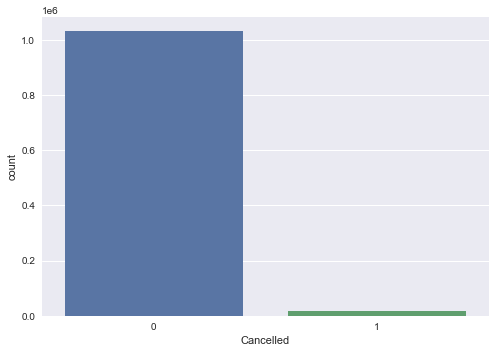

In [128]:
import seaborn as sns
sns.countplot(x='Cancelled',data=cancel_final)
plt.show()

In [129]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

In [130]:
# instantiating the random undersampler
res = NearMiss() 

# resampling X, y
X_res, y_res = res.fit_resample(X,y)
print(X_res.shape,y_res.shape)

(34094, 12) (34094,)


In [131]:
print("Original dataset shape:",format(Counter(y)))
print("Resampled dataset shape:",format(Counter(y_res)))

Original dataset shape: Counter({0: 1031528, 1: 17047})
Resampled dataset shape: Counter({0: 17047, 1: 17047})


# REAPPLYING THE MODELS ON THE BALANCED DATASET

# 1>LOGISTIC REGRESSION

In [132]:
# Splitting into train and test data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.30,random_state=None)

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score

In [135]:
lr=LogisticRegression()

In [136]:
lr.fit(X_train,y_train)

C:\Users\rauna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [137]:
print("Training Score in LR:=",accuracy_score(y_train,lr.predict(X_train)))
print("Test Score in LR:=",accuracy_score(y_test,lr.predict(X_test)))

Training Score in LR:= 0.8896710664152525
Test Score in LR:= 0.8901163359077133


In [138]:
y_pred_lr = lr.predict(X_test) 

In [139]:
print(accuracy_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

0.8901163359077133
0.10988366409228664
0.331487049659993


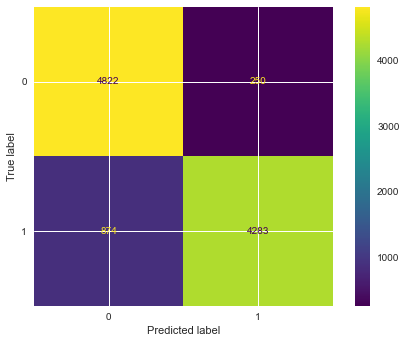

In [140]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [141]:
# Calculate the classification report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5072
           1       0.94      0.83      0.88      5157

    accuracy                           0.89     10229
   macro avg       0.90      0.89      0.89     10229
weighted avg       0.90      0.89      0.89     10229



In [142]:
# Calculate roc_auc_score
roc_auc_lr=(roc_auc_score(y_test, y_pred_lr))
print(roc_auc_lr)

0.8906157001386741


# NAIVE BAYES

In [143]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [144]:
nb.fit(X_train,y_train)

GaussianNB()

In [145]:
print("Training Scpre in NB:=",accuracy_score(y_train,nb.predict(X_train)))
print("Test Score in NB:=",accuracy_score(y_test,nb.predict(X_test)))

Training Scpre in NB:= 0.8770165514351561
Test Score in NB:= 0.8756476683937824


In [146]:
y_pred_nb = nb.predict(X_test) 

In [147]:
print(accuracy_score(y_test,y_pred_nb))
print(mean_absolute_error(y_test,y_pred_nb))
print(np.sqrt(mean_squared_error(y_test,y_pred_nb)))

0.8756476683937824
0.12435233160621761
0.35263625963054


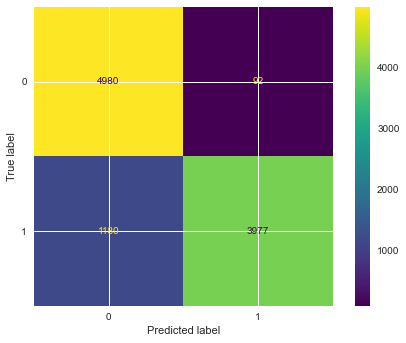

In [148]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_nb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [149]:
# Calculate the classification report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5072
           1       0.98      0.77      0.86      5157

    accuracy                           0.88     10229
   macro avg       0.89      0.88      0.87     10229
weighted avg       0.89      0.88      0.87     10229



In [150]:
# Calculate roc_auc_score
roc_auc_nb=(roc_auc_score(y_test, y_pred_nb))
print(roc_auc_nb)

0.8765229980504892


# DECISION TREE CLASSIFIER

In [151]:
from sklearn.tree import DecisionTreeClassifier
training_accuracy = []
test_accuracy = []
for max_d in range(1,30):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_train, y_train))
    print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(X_train, y_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(X_test,y_test))
    print('')

The Training Accuracy for max_depth 1 is: 0.840100565681961
The Validation Accuracy for max_depth 1 is: 0.8371297292012905

The Training Accuracy for max_depth 2 is: 0.859543264194427
The Validation Accuracy for max_depth 2 is: 0.8517939192491935

The Training Accuracy for max_depth 3 is: 0.8623088204483553
The Validation Accuracy for max_depth 3 is: 0.8584416854042428

The Training Accuracy for max_depth 4 is: 0.8846846846846846
The Validation Accuracy for max_depth 4 is: 0.883761853553622

The Training Accuracy for max_depth 5 is: 0.8974649067672323
The Validation Accuracy for max_depth 5 is: 0.8958842506598885

The Training Accuracy for max_depth 6 is: 0.9053425518541798
The Validation Accuracy for max_depth 6 is: 0.9010655978101476

The Training Accuracy for max_depth 7 is: 0.915021998742929
The Validation Accuracy for max_depth 7 is: 0.9111350083097077

The Training Accuracy for max_depth 8 is: 0.9226482296249738
The Validation Accuracy for max_depth 8 is: 0.9169029230618829

The 

In [153]:
from sklearn.tree import DecisionTreeClassifier  
dt = DecisionTreeClassifier(max_depth=16,random_state = 100)  
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, random_state=100)

In [154]:
print("Training Score in DT:=",accuracy_score(y_train,dt.predict(X_train)))
print("Test Score in DT:=",accuracy_score(y_test,dt.predict(X_test)))

Training Score in DT:= 0.9689503456945318
Test Score in DT:= 0.9315671131097859


In [155]:
y_pred_dt = dt.predict(X_test)

In [156]:
print(accuracy_score(y_test,y_pred_dt))
print(mean_absolute_error(y_test,y_pred_dt))
print(np.sqrt(mean_squared_error(y_test,y_pred_dt)))

0.9315671131097859
0.0684328868902141
0.26159680214064945


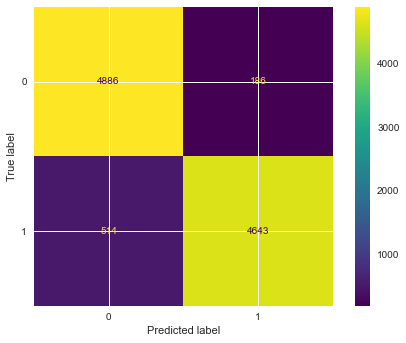

In [157]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [158]:
# Calculate the classification report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5072
           1       0.96      0.90      0.93      5157

    accuracy                           0.93     10229
   macro avg       0.93      0.93      0.93     10229
weighted avg       0.93      0.93      0.93     10229



In [159]:
# Calculate roc_auc_score
roc_auc_dt=(roc_auc_score(y_test, y_pred_dt))
print(roc_auc_dt)

0.9318288623652639


# KNN

In [160]:
from sklearn.neighbors import KNeighborsClassifier

In [195]:
#Choosing optimal value of  k 
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15.
neighbors_settings = range(1, 16)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    print('The Training Accuracy for k {} is:'.format(n_neighbors), clf.score(X_test,y_test))
    print('The Validation Accuracy for k {} is:'.format(n_neighbors), clf.score(X_test,y_test))
    print('')
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()

KeyboardInterrupt: 

In [161]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [162]:
print("Training Score in KNN:=",accuracy_score(y_train,knn.predict(X_train)))
print("Test Score in KNN:=",accuracy_score(y_test,knn.predict(X_test)))

Training Score in KNN:= 0.9223968154200712
Test Score in KNN:= 0.8767230423306286


In [163]:
y_pred_knn = knn.predict(X_test)

In [164]:
print(accuracy_score(y_test,y_pred_knn))
print(mean_absolute_error(y_test,y_pred_knn))
print(np.sqrt(mean_squared_error(y_test,y_pred_knn)))

0.8767230423306286
0.1232769576693714
0.35110818513582304


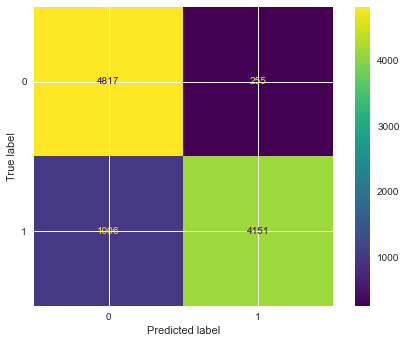

In [165]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [166]:
# Calculate the classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5072
           1       0.94      0.80      0.87      5157

    accuracy                           0.88     10229
   macro avg       0.88      0.88      0.88     10229
weighted avg       0.89      0.88      0.88     10229



In [167]:
# Calculate roc_auc_score
roc_auc_knn=(roc_auc_score(y_test, y_pred_knn))
print(roc_auc_knn)

0.8773246594778834


# ROC-AUC CURVE

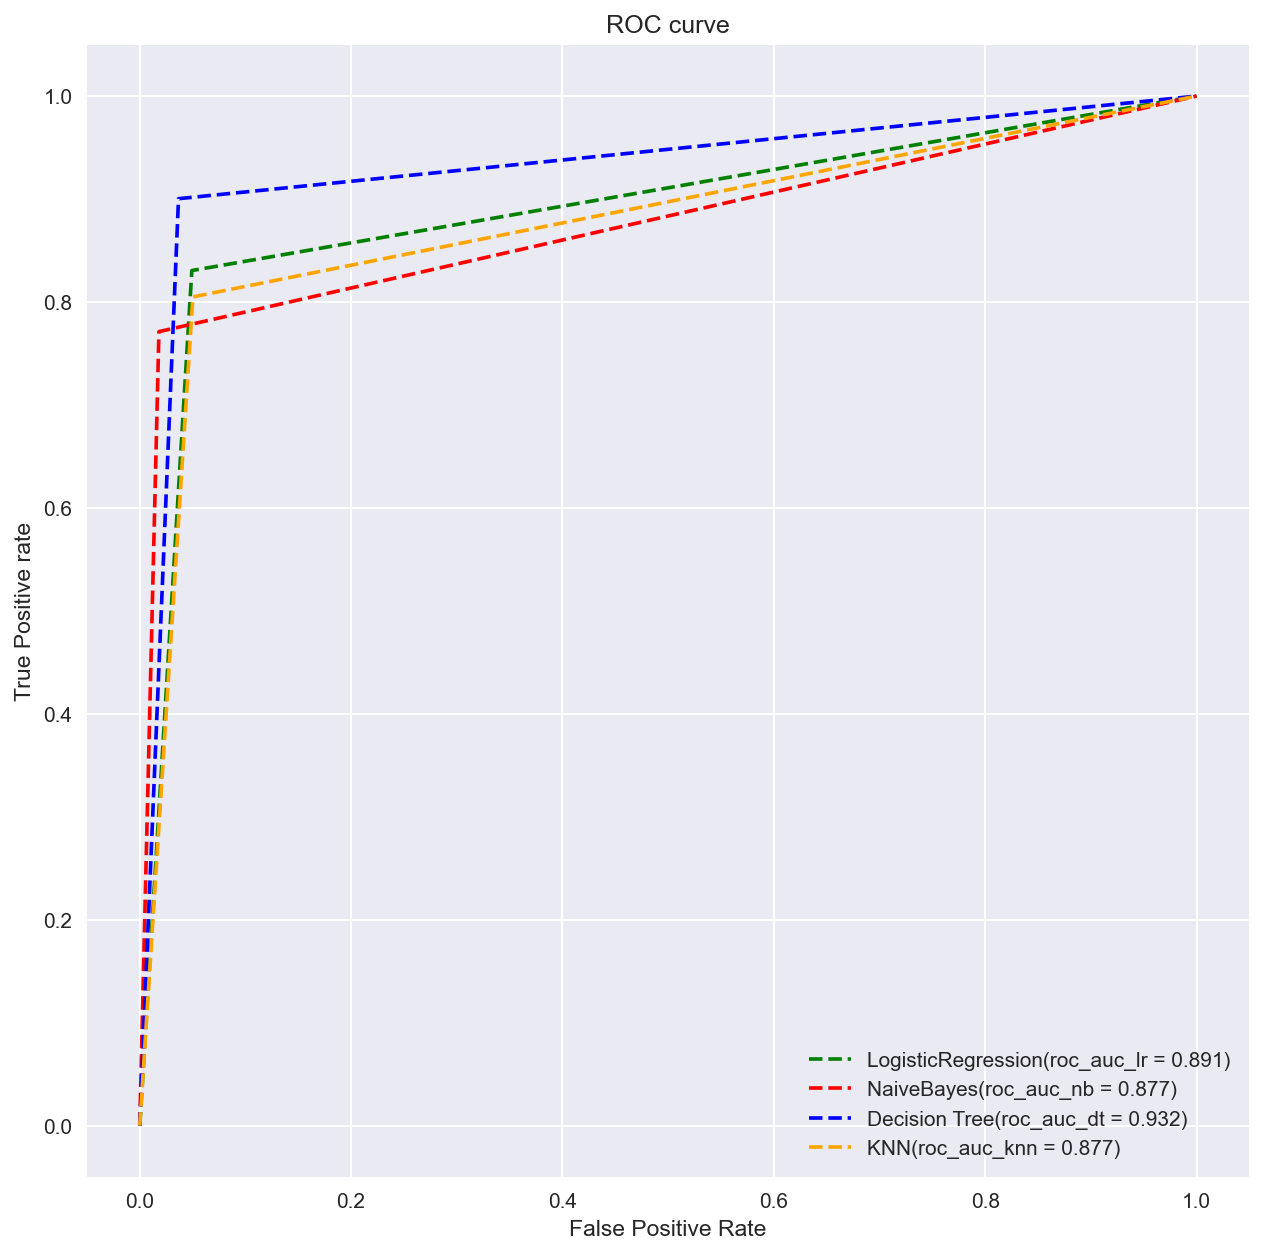

In [168]:
plt.style.use('seaborn')
fpr_lr, tpr_lr, thresh1 = roc_curve(y_test, y_pred_lr)
fpr_nb, tpr_nb, thresh2 = roc_curve(y_test, y_pred_nb)
fpr_dt, tpr_dt, thresh3 = roc_curve(y_test, y_pred_dt)
fpr_knn, tpr_knn, thresh4 = roc_curve(y_test, y_pred_knn)
# plot roc curves
plt.figure(figsize=(10, 10),dpi=150)
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='green', label='LogisticRegression(roc_auc_lr = %0.3f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, linestyle='--',color='red', label='NaiveBayes(roc_auc_nb = %0.3f)' % roc_auc_nb)
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='blue', label='Decision Tree(roc_auc_dt = %0.3f)' % roc_auc_dt)
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='orange', label='KNN(roc_auc_knn = %0.3f)' % roc_auc_knn)

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()